## Script is designed to evaluate correlation between the real probe temperature measured by the logger and the FOSS temperature evaluation

The raw data was taken from the DHI laboratory of AO Agroplem.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from pandas.plotting import table
import seaborn as sns; sns.set(style="white", color_codes=True)
import six, os

In [5]:
tm = pd.read_excel('input/FOSS2_Temperature.xlsx')
tm.tail(2)

,#inWS,#inJob,#Sub,RID,#inR,ID,Fat,Prot(T),Prot.Cru.,Prot.Tru.,...,Cond.,FPD,Cells,ASM,H.index,Date,Vol.Tot,Temp,Time,RealTemp
88,942,929,1,95,2,3 рейка,3.84,3.79,3.83,3.61,...,882.2,531,45,PASS,0.72,2020-10-20,34.64,35.02,15:59:39,39.4
89,943,930,1,95,3,3 рейка,4.16,3.90,3.90,3.70,...,917.6,528,63,FAIL,0.67,2020-10-20,33.94,35.04,15:59:51,39.4


In [3]:
#Exploratory Data Analysis

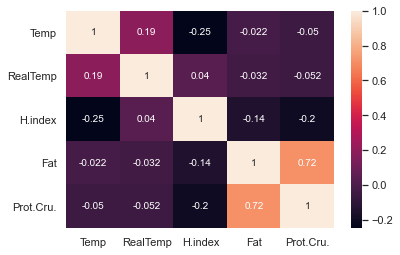

In [6]:
cols = ['Temp', 'RealTemp', 'H.index', 'Fat', 'Prot.Cru.']
hm = sns.heatmap(tm[cols].corr(),
                 cbar=True,
                 annot=True)

In [7]:
cr = tm['Temp'].corr(tm['RealTemp']).round(2)
print('Correlation between logger and FOSS temperatures: '+str(cr))

Correlation between logger and FOSS temperatures: 0.19


### Regression analysis. 
Finding correction coefficients to incorporate into a standard results processing routine.

In [8]:
X = tm[['Temp']].values
y = tm['RealTemp'].values

In [9]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

In [10]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(tm['Temp'], tm['RealTemp'])
print('R2: {:.3f}'.format(std_err))
print('p Value: {:.3f}'.format(p_value))

print('RealTemp = '+str(slope.round(3))+' * FOSStemp + '+str(intercept.round(2)))

R2: 0.036
p Value: 0.073
RealTemp = 0.066 * FOSStemp + 36.68


### Visualisation

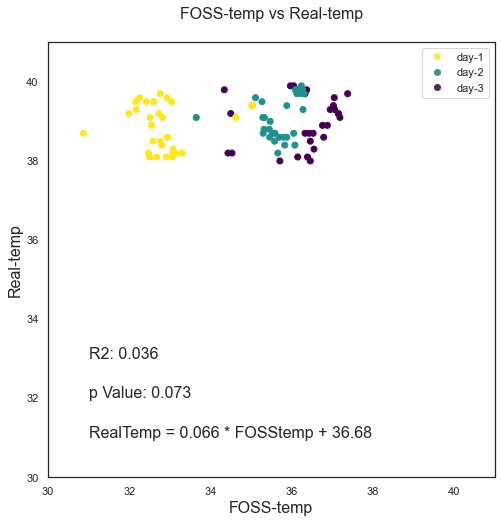

In [11]:
fig, axes = plt.subplots(figsize = (8,8))

plt.scatter(tm['Temp'],tm['RealTemp'], c = tm['Date'], cmap='viridis')

plt.plot([], [], "o", color="#fae655", label="data1")
plt.plot([], [], "o", color="#468f8b", label="data1")
plt.plot([], [], "o", color="#522564", label="data1")
plt.legend(['day-1', 'day-2','day-3'])

plt.title('FOSS-temp vs Real-temp'+'\n', fontsize=16)
plt.xlabel('FOSS-temp', fontsize=16)
plt.ylabel('Real-temp', fontsize=16)

plt.xlim(30,41)
plt.ylim(30,41)

plt.text(31,33,('R2: {:.3f}'.format(std_err)), fontsize=16)
plt.text(31,32,('p Value: {:.3f}'.format(p_value)), fontsize=16)
plt.text(31,31,('RealTemp = '+str(slope.round(3))+' * FOSStemp + '+str(intercept.round(2))), fontsize=16)

plt.savefig('FOSS-temp', dpi=150, bbox_inches = "tight")

### Conclusion: 
the difference in temperature depends on the day of the experiment (apparently on the ambient temperature in the laboratory). More research is needed to clarify the coefficients.